# EDA

## Loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
data =dataset['train'].to_pandas()
df = data.copy()

c:\Users\AB\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

### Filter for Data Scientist roles

In [5]:
df_DS_US = df[(df['job_country']=='United States')&(df['job_title_short']=='Data Scientist')]

#### Job Location

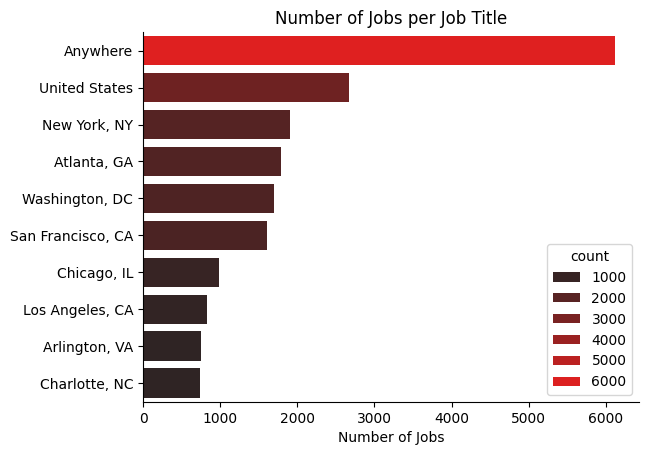

In [10]:
df_plot = df_DS_US['job_location'].value_counts().head(10).to_frame()
sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette='dark:r')
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

#### Companies Explore

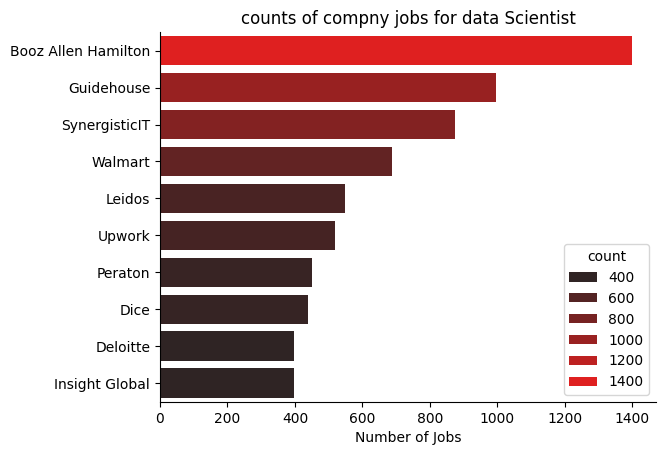

In [13]:
df_plot = df_DS_US['company_name'].value_counts().head(10).to_frame()
sns.barplot(data=df_plot,x='count',y='company_name',hue='count',palette='dark:r')
sns.despine()
plt.title('counts of compny jobs for data Scientist')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

#### offered requirements

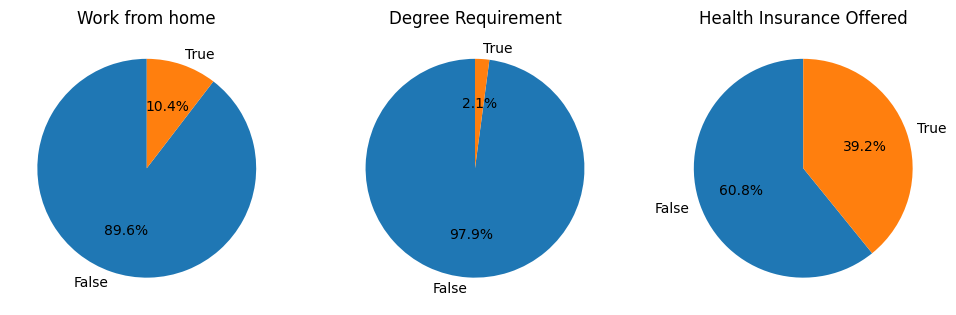

In [15]:
dict_column = {
    'job_work_from_home': 'Work from home',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig,ax=plt.subplots(1,3)
fig.set_size_inches(12,5)

for i,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_DS_US[column].value_counts(),labels=['False','True'],autopct='%1.1f%%',startangle=90)
    ax[i].set_title(title)

plt.show()